# Sentiment Analysis of IMDB Movie Reviews

**Problem Statement:**

In this project, we have to predict the number of positive and negative reviews based on sentiments by using different classification models.

**Import necessary libraries**

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from wordcloud import WordCloud
from bs4 import BeautifulSoup
from collections import defaultdict
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import LabelBinarizer

import warnings
warnings.filterwarnings('ignore')

**Import the dataset**

In [62]:
imdb_labels = open('imdb_labels.txt').readlines()
imdb_review = open('imdb_review.txt').readlines()

**Spliting the traine-test dataset**

In [63]:
#split the dataset  
#train dataset
train_reviews=imdb_review[:40000]
train_sentiments=imdb_labels[:40000]
#test dataset
test_reviews=imdb_review[40000:]
test_sentiments=imdb_labels[40000:]

print(np.shape(train_reviews),np.shape(train_sentiments))
print(np.shape(test_reviews),np.shape(test_sentiments))

(40000,) (40000,)
(10000,) (10000,)


**Text normalization**

In [64]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

**Removing html strips and noise text**

In [65]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text,"html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]','', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

#Apply function on review column
for index,comment in enumerate(imdb_review):
    imdb_review[index] = denoise_text(comment)

**Removing special characters**

In [66]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    text=re.sub(r'[\n\r\t]','',text)
    text=re.sub(r'[^a-zA-Z0-9\s]','',text)
    return text

#Apply function on review column
for index,comment in enumerate(imdb_review):
    imdb_review[index] = remove_special_characters(comment)

**Text Lemmatizing**

In [67]:
#lemmatizing the text
def simple_lemmatizer(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    text= ' '.join([wordnet_lemmatizer.lemmatize(word) for word in text.split()])
    return text
#Apply function on review column
for index,comment in enumerate(imdb_review):
    imdb_review[index] = simple_lemmatizer(comment)

**Text Stemming**

In [68]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
for index,comment in enumerate(imdb_review):
    imdb_review[index] = simple_stemmer(comment)

**Removing stopwords**

In [69]:
#set stopwords to english
stop=set(stopwords.words('english'))

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
for index,comment in enumerate(imdb_review):
    imdb_review[index] = remove_stopwords(comment)

#### Normalized train reviews

In [70]:
#normalized train reviews
norm_train_reviews=imdb_review[:40000]
norm_train_reviews[0]

'one review ha mention watch 1 Oz episod youll hook right thi exactli happen meth first thing struck Oz wa brutal unflinch scene violenc set right word GO trust thi show faint heart timid thi show pull punch regard drug sex violenc hardcor classic use wordit call OZ nicknam given oswald maximum secur state penitentari focu mainli emerald citi experiment section prison cell glass front face inward privaci high agenda Em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact go show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti wa surreal couldnt say wa readi watch develop tast Oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison exper

#### Normalized test reviews

In [71]:
#Normalized test reviews
norm_test_reviews=imdb_review[40000:]
norm_test_reviews[0]

'first want say lean liber polit scale found movi offens manag watch whole doggon disgrac film thi movi bring low origin idea ye wa origin thu 2 star instead 1 film writer uncr onli come thi act wa horribl charact unlik part lead ladi stori good qualiti made bf sort bad guy see mayb miss someth knowh wa earth relev charact movi shell ani money thi garbag almost wish peta would come rescu thi aw offens movi form protest disgust say anymor'

#### Bags of words model

It is used to convert text documents to numerical vectors or bag of words.

In [72]:
#Count vectorizer for bag of words
bag=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
bow_train_reviews=bag.fit_transform(norm_train_reviews)
#transformed test reviews
bow_test_reviews=bag.transform(norm_test_reviews)

print('BOW_train:',bow_train_reviews.shape)
print('BOW_test:',bow_test_reviews.shape)

BOW_train: (40000, 6202851)
BOW_test: (10000, 6202851)


#### Term Frequency-Inverse Document Frequency model (TFIDF)

It is used to convert text documents to  matrix of  tfidf features.

In [73]:
#Tfidf vectorizer
Tfidf=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
Tfidf_train_reviews=Tfidf.fit_transform(norm_train_reviews)
#transformed test reviews
Tfidf_test_reviews=Tfidf.transform(norm_test_reviews)

print('Tfidf_train:',Tfidf_train_reviews.shape)
print('Tfidf_test:',Tfidf_test_reviews.shape)

Tfidf_train: (40000, 6202851)
Tfidf_test: (10000, 6202851)


**Labeling the sentiment text**

In [74]:
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(imdb_labels)
print(sentiment_data.shape)

(50000, 1)


**Split the sentiment tdata**

In [75]:
#Spliting the sentiment data
train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


#### Modelling the dataset:
Building logistic regression model for both bag of words and tfidf features.

In [76]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(bow_train_reviews,train_sentiments)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(Tfidf_train_reviews,train_sentiments)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


**Logistic regression model performane on test dataset**

In [77]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(bow_test_reviews)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(Tfidf_test_reviews)
print(lr_tfidf_predict)

[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


**Accuracy of the model**

In [78]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.753
lr_tfidf_score : 0.7524


**Print the classification report**

In [79]:
#Classification report for bag of words 
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.75      0.75      4993
    Negative       0.75      0.76      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.74      0.77      0.76      4993
    Negative       0.76      0.73      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



**Stochastic gradient descent or Linear support vector machines for bag of words and tfidf features**

In [80]:
#training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
#fitting the svm for bag of words
svm_bow=svm.fit(bow_train_reviews,train_sentiments)

#fitting the svm for tfidf features
svm_tfidf=svm.fit(Tfidf_train_reviews,train_sentiments)

**Model performance on test data**

In [81]:
#Predicting the model for bag of words
svm_bow_predict=svm.predict(bow_test_reviews)
print(svm_bow_predict)
#Predicting the model for tfidf features
svm_tfidf_predict=svm.predict(Tfidf_test_reviews)
print(svm_tfidf_predict)

[1 1 0 ... 1 1 1]
[1 1 1 ... 1 1 1]


**Print the classification report**

In [82]:
#Classification report for bag of words 
svm_bow_report=classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)
#Classification report for tfidf features
svm_tfidf_report=classification_report(test_sentiments,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.94      0.18      0.30      4993
    Negative       0.55      0.99      0.70      5007

    accuracy                           0.58     10000
   macro avg       0.74      0.58      0.50     10000
weighted avg       0.74      0.58      0.50     10000

              precision    recall  f1-score   support

    Positive       1.00      0.02      0.04      4993
    Negative       0.51      1.00      0.67      5007

    accuracy                           0.51     10000
   macro avg       0.75      0.51      0.36     10000
weighted avg       0.75      0.51      0.36     10000



**Multinomial Naive Bayes for bag of words and tfidf features**

In [83]:
#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(bow_train_reviews,train_sentiments)

#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(Tfidf_train_reviews,train_sentiments)

**Model performance on test data**

In [84]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(bow_test_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(Tfidf_test_reviews)
print(mnb_tfidf_predict)

[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


**Accuracy of the model**

In [85]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.7538
mnb_tfidf_score : 0.7536


**Print the classification report**

In [86]:
#Classification report for bag of words 
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.76      0.75      4993
    Negative       0.76      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.75      0.76      0.75      4993
    Negative       0.76      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



#### Let us see positive and negative words by using WordCloud.
#### Word cloud for positive review words

<function matplotlib.pyplot.show(close=None, block=None)>

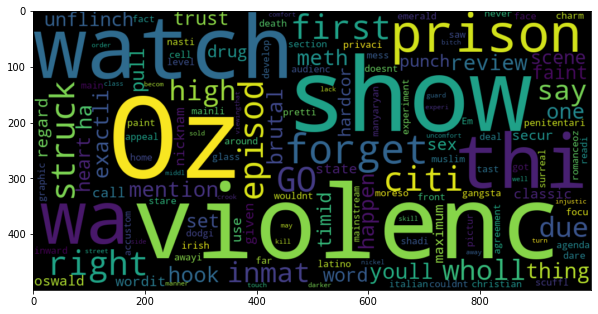

In [87]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[0]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

#### Word cloud for negative review words

<function matplotlib.pyplot.show(close=None, block=None)>

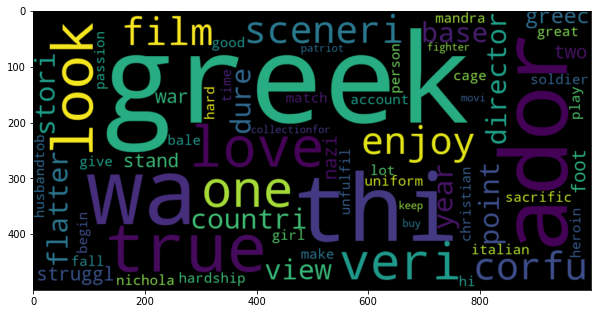

In [88]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=norm_test_reviews[5000]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

**Conclusion:**
* We can observed that both logistic regression and multinomial naive bayes model performing well compared to linear support vector  machines.
* Still we can improve the accuracy of the models by preprocessing data and by using lexicon models like Textblob.